# Word Cloud

In [1]:
!pip install konlpy
import re
import konlpy
import pandas as pd

In [2]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()

In [3]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드

In [5]:
import matplotlib.font_manager as fm
#설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f] 
print(f"nanum_font number: {len(nanum_font)}") #나눔 폰트는 없음.

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/

In [6]:
#나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [7]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [8]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum

In [9]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


## 워드클라우드 시각화

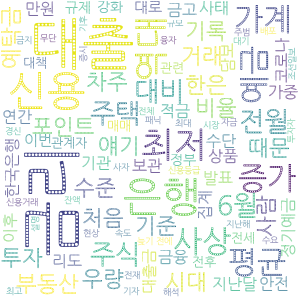

In [10]:
wordcloud = WordCloud(
    max_font_size = 60,
    width = 300,
    height = 300,
    relative_scaling = 'auto',
    font_path = path,
    background_color = 'white',)
wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

# Bike Sharing Demand

## Load Dataset

In [11]:
train = pd.read_csv('train.csv')

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리

In [13]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [14]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['day_name'] = train['datetime'].dt.day_name()

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


## 시각화

In [16]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
colors = sns.color_palette("Set2")

### 연도별 자전거 대여량과 월별 자전거 대여량

2011년에 비해 2012년에 자전거 대여량이 증가하였다. 1월부터 자전거 대여량이 점차 증가하다가 6월부터는 거의 일정한 수준을 보이고 10월부터 자전거 대여량이 다시 감소하기 시작한다. 즉, 초여름부터 초가을까지의 계절에 자전거 대여량이 많으며, 날씨가 추운 겨울에 자전거 대여량이 적다는 것을 알 수 있다.

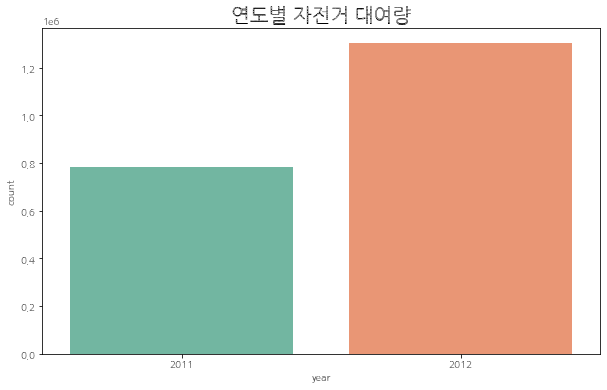

In [64]:
# 연도별 총 자전거 대여량
plt.figure(figsize=(10,6))
sns.barplot(data = train, x = 'year', y = 'count', estimator = sum, ci = None,
            palette = colors)
plt.title('연도별 자전거 대여량', size = 20)
plt.show()

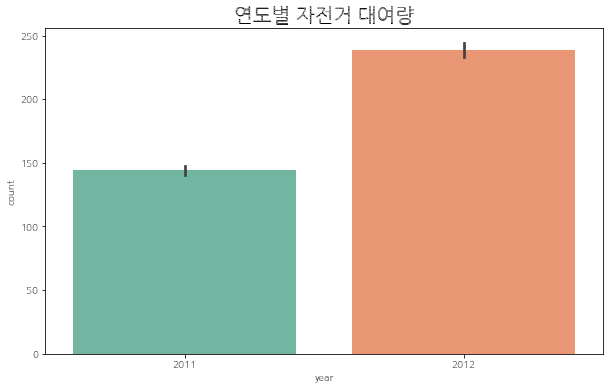

In [65]:
# 연도별 평균 자전거 대여량
plt.figure(figsize=(10,6))
sns.barplot(data = train, x = 'year', y = 'count', palette = colors)
plt.title('연도별 자전거 대여량', size = 20)
plt.show()

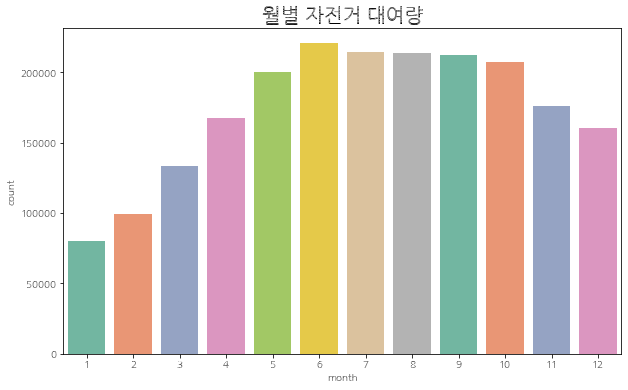

In [66]:
# 월별 총 자전거 대여량
plt.figure(figsize=(10,6))
sns.barplot(data = train, x = 'month', y = 'count', estimator = sum, ci = None,
            palette = colors)
plt.title('월별 자전거 대여량', size = 20)
plt.show()

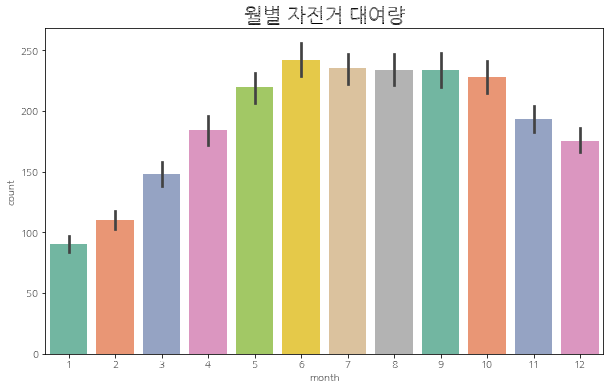

In [67]:
# 월별 평균 자전거 대여량
plt.figure(figsize=(10,6))
sns.barplot(data = train, x = 'month', y = 'count', palette = colors)
plt.title('월별 자전거 대여량', size = 20)
plt.show()

### 2011년 1월부터 2012년 12월까지 월별 자전거 대여량

2011년에 비해 2012년에 자전거 대여량이 전체적으로 증가했기 때문이다. 2012년 1월의 자전거 대여량은 2011년 1월의 자전거 대여량보다 2배 이상 많고, **2011년 12월의 자전거 대여량과 비슷한 수준이다.** 또한, 2012년 12월의 자전거 대여량도 2011년 12월의 자전거 대여량보다 많기 때문에 연도를 고려하지 않고 월별로 자전거 대여량에 대한 그래프를 그린 위의 그래프에서 1월과 12월의 자전거 대여량의 차이가 크게 나타났던 것이다.

In [68]:
train['year_month'] = train['year'].map(str)+'-'+train['month'].map(str)

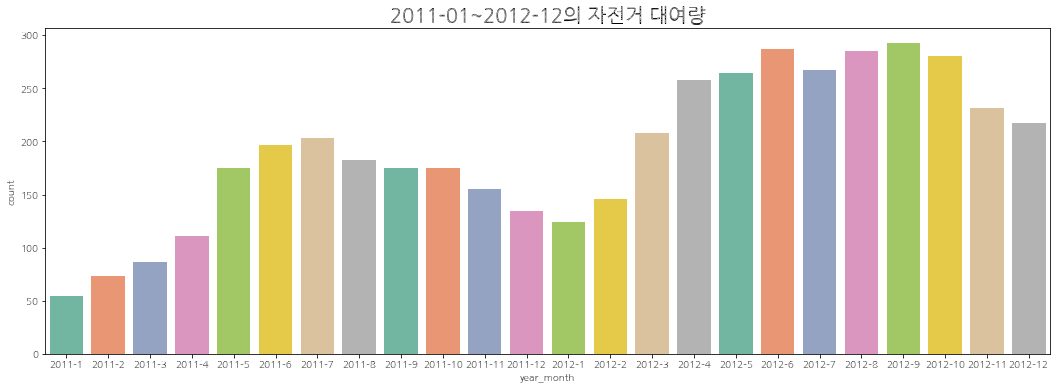

In [72]:
# 2011-01 ~ 2012-12의 평균 자전거 대여량
plt.figure(figsize=(18,6))
sns.barplot(data = train, x = 'year_month', y = 'count',
            ci = None, palette = colors)
plt.title('2011-01~2012-12의 자전거 대여량', size = 20)
plt.show()

### 시간별 자전거 대여량

새벽에 자전거 대여량이 제일 적으며, 출근/등교시간인 8시, 퇴근/하교시간인 17, 18시에 자전거 대여량이 높다는 것을 확인할 수 있다.

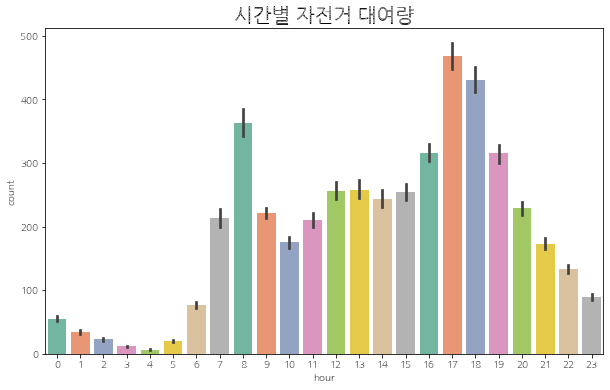

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data = train, x = 'hour', y = 'count', palette = colors)
plt.title('시간별 자전거 대여량', size = 20)
plt.show()

### 근무일/휴일에 따른 시간별 자전거 대여량

0은 평일, 1은 휴일을 의미한다. 출근/등교시간인 6, 7, 8시, 퇴근/하교시간인 17, 18시에는 평일의 자전거 대여량이 훨씬 많다는 것을 알 수 있다. 또한, 평일이라면 회사, 학교에 있을 시간대인 10-15시에는 휴일의 자전거 대여량이 훨씬 많다는 것을 알 수 있다.

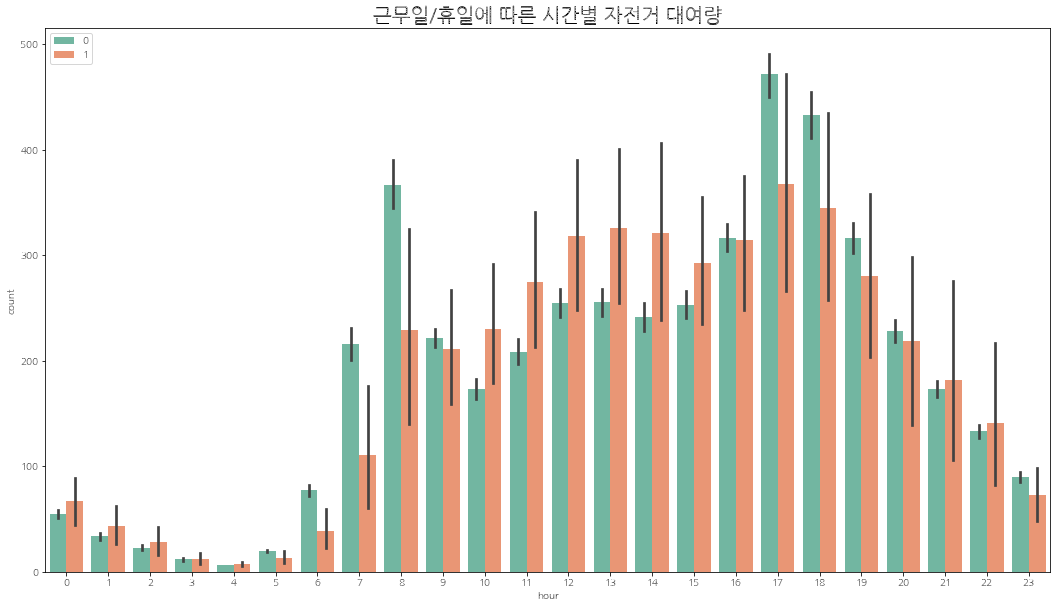

In [73]:
plt.figure(figsize=(18,10))
sns.barplot(data = train, x = 'hour', y = 'count',
            hue = 'holiday', palette = colors)
plt.title('근무일/휴일에 따른 시간별 자전거 대여량', size = 20)
plt.legend(loc = 'upper left')
plt.show()

### 요일에 따른 시간별 자전거 대여량

사람들이 주로 출근/등교하는 시간대인 6, 7, 8시와 퇴근/하교하는 시간대인 17, 18,19시에는 주말에 비해 평일의 자전거 대여량이 매우 많다. 반면, 새벽인 0-2시와 평일이라면 회사, 학교에 있을 시간대인 10-15시에는 평일보다 주말의 자전거 대여량이 훨씬 많다는 것을 알 수 있다.

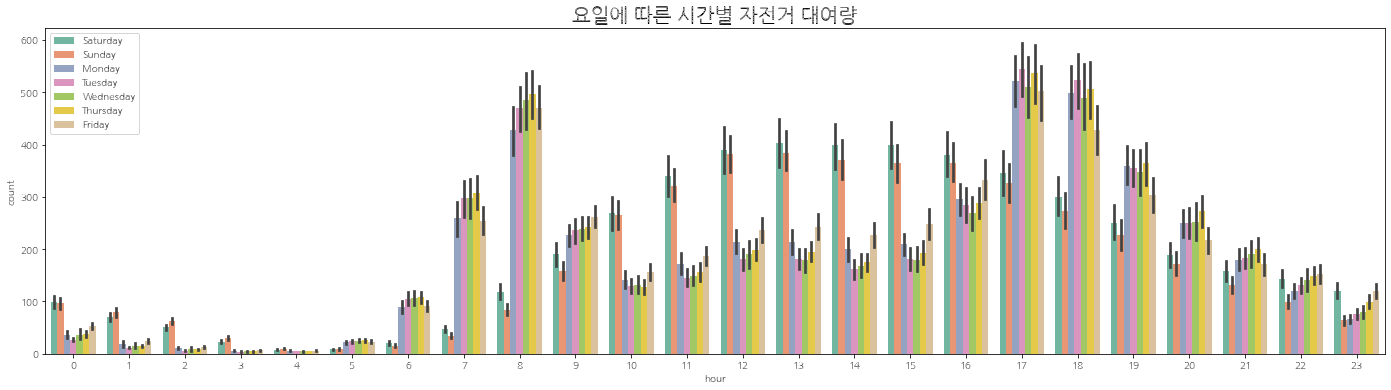

In [74]:
plt.figure(figsize=(24,6))
sns.barplot(data = train, x = 'hour', y = 'count',
            hue = 'day_name', palette = colors)
plt.title('요일에 따른 시간별 자전거 대여량', size = 20)
plt.legend(loc = 'upper left')
plt.show()

# mpg

## Load Dataset

In [77]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

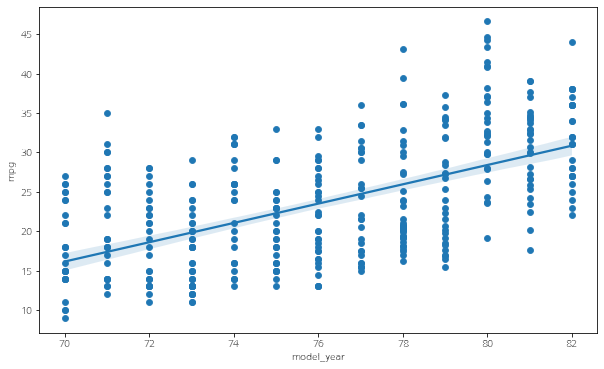

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = mpg, x = 'model_year', y = 'mpg')
sns.regplot(data = mpg, x = 'model_year', y = 'mpg')
plt.show()